In [1]:
from utils import *
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Segoe UI Symbol','simHei','Arial','sans-serif']

## Load Data

In [8]:
years = [2016,2017]
resampling_period = '1h'  # 60 minutes

data = load_resample_data(years, resampling_period)
windfarms_names = data.columns.tolist()    

year:2016	(105408, 20)
year:2017	(105120, 20)
resampled to  (17544, 20)


## Normalize Data

In [9]:
data = normalize_data_mycode(data)
# data = data.mean(axis=1)
data['avg'] = data.mean(axis=1)
data.head()

,AKE1,ARD1,BSR1,BTR1,BUL1,BUL2,CR1,CRE3,CRR1,GWW1,...,IEW1,IEW2,KHW1,NEP1,OWF1,SCR2,SCR3,SCR4,TAB1,avg
DT,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.87,0.82,0.18,0.72,0.71,0.90,0.97,0.63,0.72,0.91,...,0.52,0.38,0.90,0.99,0.91,0.90,0.93,0.93,0.51,0.77
2016-01-01 01:00:00,0.79,0.68,0.28,0.56,0.71,0.91,0.99,0.61,0.65,0.84,...,0.46,0.34,0.87,0.98,0.91,0.86,0.88,0.95,0.55,0.74
2016-01-01 02:00:00,0.82,0.64,0.22,0.55,0.71,0.82,0.98,0.62,0.60,0.71,...,0.43,0.27,0.80,0.98,0.86,0.86,0.90,0.95,0.68,0.72
2016-01-01 03:00:00,0.90,0.63,0.30,0.66,0.71,0.75,0.88,0.58,0.50,0.61,...,0.33,0.18,0.77,0.99,0.88,0.87,0.97,0.86,0.81,0.71
2016-01-01 04:00:00,0.88,0.65,0.41,0.67,0.71,0.72,0.95,0.54,0.48,0.70,...,0.33,0.23,0.84,0.94,0.88,0.79,0.98,0.72,0.78,0.71


In [10]:
data.insert(loc=0, column='year', value=[ts.year for ts in data.index])
data.insert(loc=1, column='season', value=[(ts.month-1)//3 for ts in data.index])
data.insert(loc=2, column='month', value=[ts.month for ts in data.index])
data.insert(loc=3, column='day', value=[ts.day for ts in data.index])
data.insert(loc=4, column='hour', value=[ts.hour for ts in data.index])
data.head(4)

,year,season,month,day,hour,AKE1,ARD1,BSR1,BTR1,BUL1,...,IEW1,IEW2,KHW1,NEP1,OWF1,SCR2,SCR3,SCR4,TAB1,avg
DT,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2016,0,1,1,0,0.87,0.82,0.18,0.72,0.71,...,0.52,0.38,0.90,0.99,0.91,0.90,0.93,0.93,0.51,0.77
2016-01-01 01:00:00,2016,0,1,1,1,0.79,0.68,0.28,0.56,0.71,...,0.46,0.34,0.87,0.98,0.91,0.86,0.88,0.95,0.55,0.74
2016-01-01 02:00:00,2016,0,1,1,2,0.82,0.64,0.22,0.55,0.71,...,0.43,0.27,0.80,0.98,0.86,0.86,0.90,0.95,0.68,0.72
2016-01-01 03:00:00,2016,0,1,1,3,0.90,0.63,0.30,0.66,0.71,...,0.33,0.18,0.77,0.99,0.88,0.87,0.97,0.86,0.81,0.71


In [159]:
sub_data = data.iloc[0:300,-20:-1]
# sub_data.plot(kind='line',subplots=True,legend=False,xticks=None,sharex=True, figsize=(12,18))
# fig.savefig('alaki.pdf', dpi = 300, bbox_inches='tight')    
sub_data2=sub_data - 0.9
sub_data2.apply(calc_stored_eng_used,axis=0)

ARD1   1.07
BSR1   0.51
BTR1   1.12
BUL1   0.63
BUL2   0.08
CR1    1.65
CRE3   0.00
CRR1   1.76
GWW1   1.42
HAL1   2.08
IEW1   0.73
IEW2   1.63
KHW1   0.64
NEP1   2.08
OWF1   1.46
SCR2   0.90
SCR3   1.45
SCR4   0.79
TAB1   0.89
dtype: float64

spillage


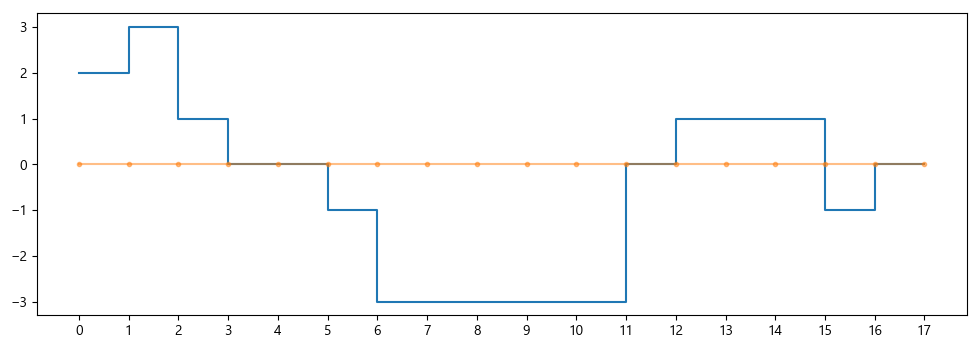

In [169]:
t = np.array([7,7,8,6,5,5, 4, 2,2,2,2,2,5,6,6,6,4,5])
t = t -5
fig,ax = plt.subplots(figsize=(12,4),dpi=100)
plt.step(np.arange(0,len(t)),t)
zero = np.zeros(len(t))
plt.plot(zero,'.-',alpha=0.5)
ax.set_xticks(np.arange(0,len(t)))
print('spillage')

In [163]:
def calc_stored_eng_used(data, cap = 3):
    charge = 0
    charges = []
    u = 0
    for i,v in enumerate(data):
        charge = max(0,min(cap,charge+v))
        charges.append(charge)
        # print('hour = ', i , ' \t  charge =', charge)
    a = np.diff(charges)
    returned_charged_energy = - sum(a[a < 0]) 
    return returned_charged_energy

calc_stored_eng_used(t)

4

In [12]:
def load_resample_demand_data(years, resampling_period = '15T'):
    raw_data = []
    for year in (years):
        raw_data_year = pd.read_csv('NRGstreamData\Load_data\load225_'+ str(year) 
                               + '-01-01_'+ str(year) + '-12-31_5.csv', header=None )
        raw_data_year.columns = ['DT', 'Load']
        raw_data_year.set_index('DT', inplace=True)      

        raw_data.append(raw_data_year)
        print('year:'+ str(year) + '\t' + str(raw_data_year.shape))
    raw_data = pd.concat(raw_data)
    
    # convert index to datestime format
    raw_data.index = raw_data.index.map(datetime_convertor)

    # Resmaple data
    data = raw_data.resample(resampling_period).mean()
    print('resampled to ',str(data.shape))   
    
    #### Convert data to Intetger  OR  round data 
    pd.options.display.float_format = '{:.2f}'.format
    data = data.round(decimals=2)
    # data = data.astype(int)
    
    return data


In [24]:
demand_data = load_resample_demand_data(years, resampling_period = '1h')

year:2016	(105408, 1)
year:2017	(105120, 1)
resampled to  (17544, 1)


In [25]:
normalized_demand_data = normalize_data_mycode(demand_data)
normalized_demand_data.insert(loc=0, column='hour', value=[ts.hour for ts in data.index])
normalized_demand_data.head()

,hour,Load
DT,,
2016-01-01 00:00:00,0,0.54
2016-01-01 01:00:00,1,0.51
2016-01-01 02:00:00,2,0.47
2016-01-01 03:00:00,3,0.45
2016-01-01 04:00:00,4,0.44


In [26]:
np.corrcoef(normalized_demand_data['Load'],data['avg'])[0,1]

0.023326890029674027

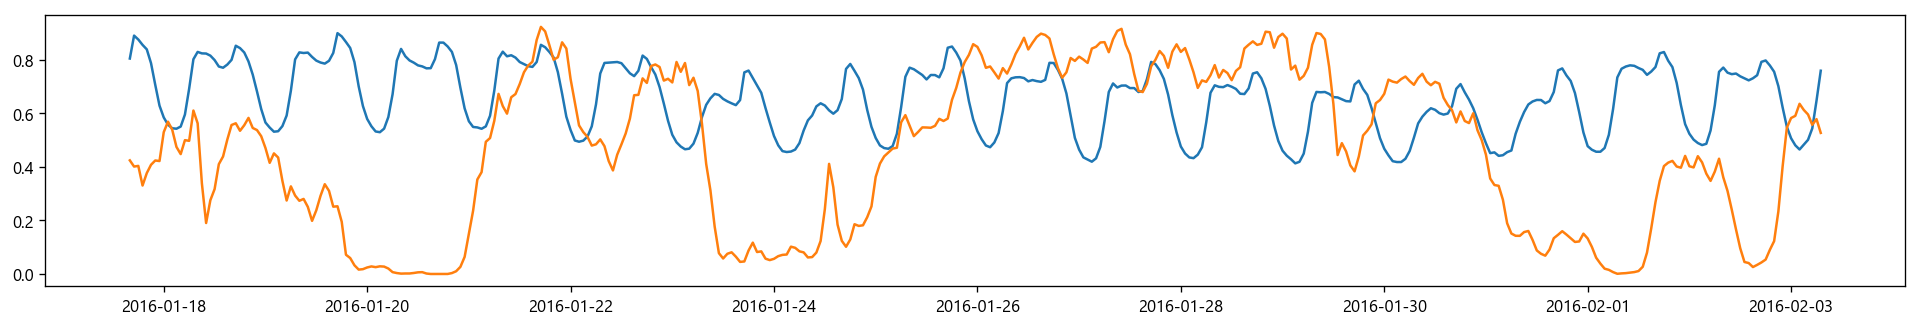

In [51]:
m = 400 
n = 800
plt.subplots(figsize=(20,3), dpi = 120)
plt.plot(normalized_demand_data['Load'][m:n])
plt.plot(data['avg'][m:n],label='avg gen')


In [161]:
a = data.groupby('hour').mean()
a.head()
b = normalized_demand_data.groupby('hour').mean()

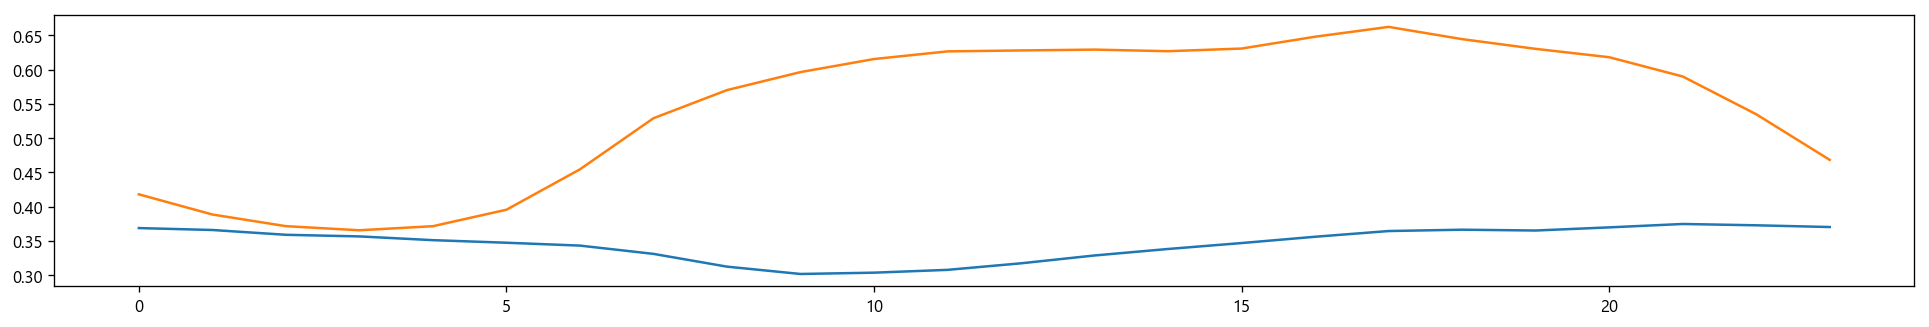

In [38]:
plt.subplots(figsize=(20,3), dpi = 120)
plt.plot(a['avg'])
plt.plot(b)